<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Process-Data" data-toc-modified-id="Process-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Process Data</a></span></li><li><span><a href="#Pre-Process-Data-For-Deep-Learning" data-toc-modified-id="Pre-Process-Data-For-Deep-Learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pre-Process Data For Deep Learning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Look-at-one-example-of-processed-issue-bodies" data-toc-modified-id="Look-at-one-example-of-processed-issue-bodies-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Look at one example of processed issue bodies</a></span></li><li><span><a href="#Look-at-one-example-of-processed-issue-titles" data-toc-modified-id="Look-at-one-example-of-processed-issue-titles-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>Look at one example of processed issue titles</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Define-Model-Architecture" data-toc-modified-id="Define-Model-Architecture-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Define Model Architecture</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-the-data-from-disk-into-variables" data-toc-modified-id="Load-the-data-from-disk-into-variables-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Load the data from disk into variables</a></span></li><li><span><a href="#Define-Model-Architecture" data-toc-modified-id="Define-Model-Architecture-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Define Model Architecture</a></span></li></ul></li></ul></li><li><span><a href="#Train-Model" data-toc-modified-id="Train-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train Model</a></span></li><li><span><a href="#See-Results-On-Holdout-Set" data-toc-modified-id="See-Results-On-Holdout-Set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>See Results On Holdout Set</a></span></li><li><span><a href="#Feature-Extraction-Demo" data-toc-modified-id="Feature-Extraction-Demo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Extraction Demo</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Example-1:-Issues-Installing-Python-Packages" data-toc-modified-id="Example-1:-Issues-Installing-Python-Packages-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Example 1: Issues Installing Python Packages</a></span></li><li><span><a href="#Example-2:--Issues-asking-for-feature-improvements" data-toc-modified-id="Example-2:--Issues-asking-for-feature-improvements-6.0.2"><span class="toc-item-num">6.0.2&nbsp;&nbsp;</span>Example 2:  Issues asking for feature improvements</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import logging
import glob
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 500)
logger = logging.getLogger()
logger.setLevel(logging.WARNING)

# Process Data

Look at filesystem to see files extracted from BigQuery (or Kaggle: https://www.kaggle.com/davidshinn/github-issues/)

In [9]:
!ls -lah | grep github_issues.csv

-rw-r--r-- 1 40294 40294 2.7G Jan 18  2018 github_issues.csv


Split data into train and test set and preview data

In [11]:
#read in data sample 2M rows (for speed of tutorial)
traindf, testdf = train_test_split(pd.read_csv('github_issues.csv').sample(n=2000000), 
                                   test_size=.10)


#print out stats about shape of data
print(f'Train: {traindf.shape[0]:,} rows {traindf.shape[1]:,} columns')
print(f'Test: {testdf.shape[0]:,} rows {testdf.shape[1]:,} columns')

# preview data
traindf.head(3)

Train: 1,800,000 rows 3 columns
Test: 200,000 rows 3 columns


,issue_url,issue_title,body
3165423,"""https://github.com/1000hz/bootstrap-validator/issues/574""",uncaught typeerror: f b is not a function when using $ ... .validator 'update',the above error is being thrown when i try and run update via js to include some new fields that have been added dynamically. i'm using backbone.js rendering a script template element to add a new set up fields based on user interaction. the full error message is: uncaught typeerror: f b is not a function at htmlformelement.<anonymous> validator.min.js:9 at function.each jquery.min.js:2 at n.fn.init.each jquery.min.js:2 at n.fn.init.b as validator validator.min.js:9 at n.initskillgroup app.l...
2763145,"""https://github.com/quasar-analytics/quasar/issues/2821""",invoke endpoint regression,"problem accures in versions: 21.x.x , 23.x.x and 24.x.x didn't check 22.x.x first query is put to view mount sql select from /test-mount/testdb/flatviz the second one sql select row.seriesone as seriesone, row.seriestwo as seriestwo, min row.measureone as measureone from output_of_first_query as row group by row.seriesone, row.seriestwo order by row.seriesone asc, row.seriestwo asc the third one is sql select from output_of_second_query where seriesone = one-one in 20.14.13 this works as exp..."
3882729,"""https://github.com/msharov/ustl/issues/79""",build ustl with clang on linux,"hi, on ubuntu 14.04 clang 3.4, gcc 4.8.4 and fedora 22 clang 3.5, gcc 5.3.1 : cc=clang cxx=clang++ ./configure --libdir=path/to/libsupc++.a without --libdir it searches for libcxxabi when cc=clang make works fine, make check however shows quite a few diffs. is such configuration supposed to work? thanks!"


**Convert to lists in preparation for modeling**

In [9]:
train_body_raw = traindf.body.tolist()
train_title_raw = traindf.issue_title.tolist()
#preview output of first element
train_body_raw[0]

'some of the sds alerts do not have clearing alerts. so it always present in alerting directory. these kinds of alerts should be stored in etcd under /alerting/notify, it never goes to alerting/alerts directory and it is not displayed under alerts in ui also. these kinds of alerts are notified via notification channel and deleted via ttl. node_agent should have a logic to handle this in alerting framework.'

# Pre-Process Data For Deep Learning

See [this repo](https://github.com/hamelsmu/ktext) for documentation on the ktext package

In [10]:
%reload_ext autoreload
%autoreload 2
from ktext.preprocess import processor

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
%%time
# Clean, tokenize, and apply padding / truncating such that each document length = 70
#  also, retain only the top 8,000 words in the vocabulary and set the remaining words
#  to 1 which will become common index for rare words 
body_pp = processor(keep_n=8000, padding_maxlen=70)
train_body_vecs = body_pp.fit_transform(train_body_raw)

CPU times: user 22min 17s, sys: 1min 16s, total: 23min 34s
Wall time: 50min 53s


#### Look at one example of processed issue bodies

In [12]:
print('\noriginal string:\n', train_body_raw[0], '\n')
print('after pre-processing:\n', train_body_vecs[0], '\n')


original string:
 some of the sds alerts do not have clearing alerts. so it always present in alerting directory. these kinds of alerts should be stored in etcd under /alerting/notify, it never goes to alerting/alerts directory and it is not displayed under alerts in ui also. these kinds of alerts are notified via notification channel and deleted via ttl. node_agent should have a logic to handle this in alerting framework. 

after pre-processing:
 [37 33 39  1  6 17 29 22 13  6  3 36 25  8 34 23  1 15  3 40 26 33  6 35
 11 38 23 18 45  1  4 32  2 25 28 20 42  1  4  6 15  9 25 24 29 16 45  6
 23 44  7  3 40 26 33  6 10 31 46 30 12  9 14 46 43  3  1 35 22  5] 



In [13]:
# Instantiate a text processor for the titles, with some different parameters
#  append_indicators = True appends the tokens '_start_' and '_end_' to each
#                      document
#  padding = 'post' means that zero padding is appended to the end of the 
#             of the document (as opposed to the default which is 'pre')
title_pp = processor(append_indicators=True, keep_n=4500, 
                     padding_maxlen=12, padding ='post')

# process the title data
train_title_vecs = title_pp.fit_transform(train_title_raw)

#### Look at one example of processed issue titles

In [14]:
print('\noriginal string:\n', train_title_raw[0])
print('after pre-processing:\n', train_title_vecs[0])


original string:
 node_agent should handle sds native alerts also
after pre-processing:
 [3 1 8 6 1 7 4 5 2 0 0 0]


Serialize all of this to disk for later use

In [15]:
import dill as dpickle
import numpy as np

# Save the preprocessor
with open('body_pp.dpkl', 'wb') as f:
    dpickle.dump(body_pp, f)

with open('title_pp.dpkl', 'wb') as f:
    dpickle.dump(title_pp, f)

# Save the processed data
np.save('train_title_vecs.npy', train_title_vecs)
np.save('train_body_vecs.npy', train_body_vecs)

# Define Model Architecture

### Load the data from disk into variables

In [16]:
from seq2seq_utils import load_decoder_inputs, load_encoder_inputs, load_text_processor

In [17]:
encoder_input_data, doc_length = load_encoder_inputs('train_body_vecs.npy')
decoder_input_data, decoder_target_data = load_decoder_inputs('train_title_vecs.npy')

Shape of encoder input: (1800000, 70)
Shape of decoder input: (1800000, 11)
Shape of decoder target: (1800000, 11)


In [18]:
num_encoder_tokens, body_pp = load_text_processor('body_pp.dpkl')
num_decoder_tokens, title_pp = load_text_processor('title_pp.dpkl')

Size of vocabulary for body_pp.dpkl: 8,002
Size of vocabulary for title_pp.dpkl: 4,502


### Define Model Architecture

In [19]:
%matplotlib inline
from keras.models import Model
from keras.layers import Input, LSTM, GRU, Dense, Embedding, Bidirectional, BatchNormalization
from keras import optimizers

In [20]:
#arbitrarly set latent dimension for embedding and hidden units
latent_dim = 300

##### Define Model Architecture ######

########################
#### Encoder Model ####
encoder_inputs = Input(shape=(doc_length,), name='Encoder-Input')

# Word embeding for encoder (ex: Issue Body)
x = Embedding(num_encoder_tokens, latent_dim, name='Body-Word-Embedding', mask_zero=False)(encoder_inputs)
x = BatchNormalization(name='Encoder-Batchnorm-1')(x)

# Intermediate GRU layer (optional)
#x = GRU(latent_dim, name='Encoder-Intermediate-GRU', return_sequences=True)(x)
#x = BatchNormalization(name='Encoder-Batchnorm-2')(x)

# We do not need the `encoder_output` just the hidden state.
_, state_h = GRU(latent_dim, return_state=True, name='Encoder-Last-GRU')(x)

# Encapsulate the encoder as a separate entity so we can just 
#  encode without decoding if we want to.
encoder_model = Model(inputs=encoder_inputs, outputs=state_h, name='Encoder-Model')

seq2seq_encoder_out = encoder_model(encoder_inputs)

########################
#### Decoder Model ####
decoder_inputs = Input(shape=(None,), name='Decoder-Input')  # for teacher forcing

# Word Embedding For Decoder (ex: Issue Titles)
dec_emb = Embedding(num_decoder_tokens, latent_dim, name='Decoder-Word-Embedding', mask_zero=False)(decoder_inputs)
dec_bn = BatchNormalization(name='Decoder-Batchnorm-1')(dec_emb)

# Set up the decoder, using `decoder_state_input` as initial state.
decoder_gru = GRU(latent_dim, return_state=True, return_sequences=True, name='Decoder-GRU')
decoder_gru_output, _ = decoder_gru(dec_bn, initial_state=seq2seq_encoder_out)
x = BatchNormalization(name='Decoder-Batchnorm-2')(decoder_gru_output)

# Dense layer for prediction
decoder_dense = Dense(num_decoder_tokens, activation='softmax', name='Final-Output-Dense')
decoder_outputs = decoder_dense(x)

########################
#### Seq2Seq Model ####

#seq2seq_decoder_out = decoder_model([decoder_inputs, seq2seq_encoder_out])
seq2seq_Model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


seq2seq_Model.compile(optimizer=optimizers.Nadam(lr=0.001), loss='sparse_categorical_crossentropy')

** Examine Model Architecture Summary **

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Decoder-Input (InputLayer)      (None, None)         0                                            
__________________________________________________________________________________________________
Decoder-Word-Embedding (Embeddi (None, None, 300)    1350600     Decoder-Input[0][0]              
__________________________________________________________________________________________________
Encoder-Input (InputLayer)      (None, 70)           0                                            
__________________________________________________________________________________________________
Decoder-Batchnorm-1 (BatchNorma (None, None, 300)    1200        Decoder-Word-Embedding[0][0]     
__________________________________________________________________________________________________
Encoder-Mo

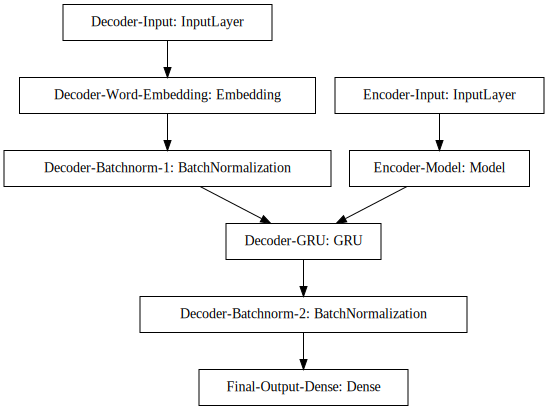

In [21]:
from seq2seq_utils import viz_model_architecture
seq2seq_Model.summary()
viz_model_architecture(seq2seq_Model)

# Train Model

In [22]:
from keras.callbacks import CSVLogger, ModelCheckpoint

script_name_base = 'tutorial_seq2seq'
csv_logger = CSVLogger('{:}.log'.format(script_name_base))
model_checkpoint = ModelCheckpoint('{:}.epoch{{epoch:02d}}-val{{val_loss:.5f}}.hdf5'.format(script_name_base),
                                   save_best_only=True)

batch_size = 1200
epochs = 7
history = seq2seq_Model.fit([encoder_input_data, decoder_input_data], np.expand_dims(decoder_target_data, -1),
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.12, callbacks=[csv_logger, model_checkpoint])

Train on 1584000 samples, validate on 216000 samples
Epoch 1/7
1584000/1584000 [==============================] - 265s 167us/step - loss: 2.7234 - val_loss: 2.4321


/ds/.local/lib/python3.6/site-packages/keras/engine/topology.py:2344: UserWarning: Layer Decoder-GRU was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'Encoder-Model/Encoder-Last-GRU/while/Exit_2:0' shape=(?, 300) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '


Epoch 2/7
1584000/1584000 [==============================] - 263s 166us/step - loss: 2.3446 - val_loss: 2.3563
Epoch 3/7
1584000/1584000 [==============================] - 263s 166us/step - loss: 2.2608 - val_loss: 2.3281
Epoch 4/7
1584000/1584000 [==============================] - 263s 166us/step - loss: 2.2117 - val_loss: 2.3161
Epoch 5/7
1584000/1584000 [==============================] - 263s 166us/step - loss: 2.1767 - val_loss: 2.3110
Epoch 6/7
1584000/1584000 [==============================] - 263s 166us/step - loss: 2.1494 - val_loss: 2.3095
Epoch 7/7
1584000/1584000 [==============================] - 265s 167us/step - loss: 2.1268 - val_loss: 2.3124


In [23]:
#save model
seq2seq_Model.save('seq2seq_model_tutorial.h5')

/ds/.local/lib/python3.6/site-packages/keras/engine/topology.py:2344: UserWarning: Layer Decoder-GRU was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'Encoder-Model/Encoder-Last-GRU/while/Exit_2:0' shape=(?, 300) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  str(node.arguments) + '. They will not be included '


# See Results On Holdout Set

In [27]:
from seq2seq_utils import Seq2Seq_Inference
seq2seq_inf = Seq2Seq_Inference(encoder_preprocessor=body_pp,
                                 decoder_preprocessor=title_pp,
                                 seq2seq_model=seq2seq_Model)

In [34]:
# this method displays the predictions on random rows of the holdout set
seq2seq_inf.demo_model_predictions(n=50, issue_df=testdf)



============== Example # 137237 =================

"https://github.com/envisionnw/upland/issues/90"
Issue Body:
 <a href= https://github.com/ncpn ><img src= https://avatars3.githubusercontent.com/u/9699622?v=3 align= left width= 96 height= 96 hspace= 10 ></img></a> issue by ncpn https://github.com/ncpn _friday mar 17, 2017 at 19:31 gmt_
_originally opened as https://github.com/ncpn/upland/issues/90_ ---- check for odd species after completing the plot. compare with list of prior year's species. paper list 

Original Title:
 end of plot issues - identify odd species

****** Machine Generated Title (Prediction) ******:
 closed species plot not working


============== Example # 132413 =================

"https://github.com/open-organization-ambassadors/open-org-it-culture/issues/38"
Issue Body:
 need to include a specific call to the opensource.com writers list during the announcement part of the book series process. 

Original Title:
 update announcement process

****** Machine Genera

 permanent redirect 308 not supported in ie11

****** Machine Generated Title (Prediction) ******:
 redirect to * number * redirect does not work


============== Example # 197532 =================

"https://github.com/ngrx/platform/issues/49"
Issue Body:
 export const selectfeature = createfeatureselector<featurestate> 'feature' ; ~~~~~~~~~~~~~~~ error ts4023: exported variable 'selectfeature' has or is using name 'memoizedselector' from external module .../ngrx/modules/store/src/selector but cannot be named. 

Original Title:
 memoizedselector needs to be exported as well

****** Machine Generated Title (Prediction) ******:
 export ' ' : ' can not be used in ' module


============== Example # 163719 =================

"https://github.com/aspnet/StaticFiles/issues/211"
Issue Body:
 staticfiles/src/microsoft.aspnet.staticfiles/fileextensioncontenttypeprovider.cs is missing the outlook .msg mimetype - currently manually doing the following: var provider = new fileextensioncontenttypepr


****** Machine Generated Title (Prediction) ******:
 new member does not set the team member


============== Example # 64152 =================

"https://github.com/linuxboss182/SoftEng-2017/issues/84"
Issue Body:
 need 3-4 people to present our application to the class on wednesday. applicants must: - not have presented last week - understand how to use the application - be ready to kick ass remember, you have to present at either this wednesday or the next one, so plan accordingly! 

Original Title:
 iteration 2 presentation

****** Machine Generated Title (Prediction) ******:
 add a new class to the application


============== Example # 69032 =================

"https://github.com/kartoza/qgis.org.za/issues/184"
Issue Body:
 i created a form 'contact' and it seems to work but the form labels do not appear on the form so it is a bit useless. please get the labels to appear and merge and release with other improvements asap 

Original Title:
 form labels not appearing

****** Machin


****** Machine Generated Title (Prediction) ******:
 first from flow in uk south


============== Example # 24718 =================

"https://github.com/sensorario/go-tris/issues/34"
Issue Body:
 move 1 simone : 5 move 2 computer : 2 move 3 simone : 9 move 4 computer : 1 move 5 simone : 3 move 6 computer : 6 move 7 simone : 8 move 8 computer : 7 move 9 simone : 4 

Original Title:
 in this case computer loose

****** Machine Generated Title (Prediction) ******:
 move to * number *


============== Example # 2005 =================

"https://github.com/fossasia/susi_firefoxbot/issues/6"
Issue Body:
 actual behaviour only text response from the server is shown expected behaviour support different types of responses like images, links, tables etc. would you like to work on the issue ? yes 

Original Title:
 support for different types of responses from server

****** Machine Generated Title (Prediction) ******:
 support for different types of response


============== Example # 144769 ===

# Feature Extraction Demo

In [68]:
# Read All 5M data points
all_data_df = pd.read_csv('github_issues.csv')
# Extract the bodies from this dataframe
all_data_bodies = all_data_df['body'].tolist()

In [70]:
# transform all of the data using the ktext processor
all_data_vectorized = body_pp.transform_parallel(all_data_bodies)

In [71]:
# save transformed data
with open('all_data_vectorized.dpkl', 'wb') as f:
    dpickle.dump(all_data_vectorized, f)

In [262]:
%reload_ext autoreload
%autoreload 2
from seq2seq_utils import Seq2Seq_Inference
seq2seq_inf_rec = Seq2Seq_Inference(encoder_preprocessor=body_pp,
                                    decoder_preprocessor=title_pp,
                                    seq2seq_model=seq2seq_Model)
recsys_annoyobj = seq2seq_inf_rec.prepare_recommender(all_data_vectorized, all_data_df)

### Example 1: Issues Installing Python Packages

In [223]:
seq2seq_inf_rec.demo_model_predictions(n=1, issue_df=testdf, threshold=1)



============== Example # 13563 =================

"https://github.com/bnosac/pattern.nlp/issues/5"
Issue Body:
 thanks for your package, i can't wait to use it. unfortunately i have issues with the installation. prerequisite is 'first install python version 2.5+ not version 3 '. so this package cant be used with version 3.6 64bit that i have installed? i nevertheless tried to install it using pip, conda is not supported? but got an error: 'syntaxerror: missing parentheses in call to 'print''. besides when i try to run the library in r version 3.3.3. 64 bit i got errors with can_find_python_cmd required_modules = pattern.db : 'error in find_python_cmd......' pattern seems to be written in python but must be used in r, why cant it be used in python? i found another python pattern application that apparently does the same in python: https://pypi.python.org/pypi/pattern how is this related? 

Original Title:
 error installation python

****** Machine Generated Title (Prediction) ******:


,issue_url,issue_title,body,dist
286906,"""https://github.com/scikit-hep/root_numpy/issues/337""",root 6.10/02 and root_numpy compatibility,i am trying to pip install root_pandas and one of the dependency is root_numpy however some weird reasons i am unable to install it even though i can import root in python. i am working on python3.6 as i am more comfortable with it. is root_numpy is not yet compatible with the latest root?,0.694671
314005,"""https://github.com/andim/noisyopt/issues/4""",joss review: installing dependencies via pip,"hi, i'm trying to install noisyopt in a clean conda environment running python 3.5. running pip install noisyopt does not install the dependencies numpy, scipy . i see that you do include a requires keyword argument in your setup.py file, does this need to be install_requires ? as in https://packaging.python.org/requirements/ . also, not necessary if you don't want to, but i think it would be good to include a list of dependences somewhere in the readme.",0.698265
48120,"""https://github.com/turi-code/SFrame/issues/389""",python 3.6 compatible,"hi: i tried to install sframe using pip and conda but i can not find anything that will work with python 3.6? has sframe been updated to work with python 3.6 yet? thanks, drew",0.718715


### Example 2:  Issues asking for feature improvements

In [226]:
seq2seq_inf_rec.demo_model_predictions(n=1, issue_df=testdf, threshold=1)



============== Example # 157322 =================

"https://github.com/Chingu-cohorts/devgaido/issues/89"
Issue Body:
 right now, your profile link is https://devgaido.com/profile. this is fine, but it would be really cool if there was a way to share your profile with other people. on my portfolio, i have social media buttons to freecodecamp, github, ect. without a custom link, i cannot show-off what i have done on devgaido to future employers. 

Original Title:
 feature request: sharable profile.

****** Machine Generated Title (Prediction) ******:
 add a link to your profile

**** Similar Issues (using encoder embedding) ****:



,issue_url,issue_title,body,dist
250423,"""https://github.com/ParabolInc/action/issues/1379""",integrations list view discoverability,"issue - enhancement i was initially confused by the link to my account copy; seeing github in the integrations list made me think it had already been set up . i realize now that i had to allow parabol to post as me. i think that link to my account could use a tooltip explaining what link means, and why you'd want to do so. <img width= 728 alt= screen shot 2017-09-29 at 10 52 05 am src= https://user-images.githubusercontent.com/2146312/31024786-2fd39c46-a50e-11e7-9f2a-6d4a5ed2baeb.png >",0.748828
222304,"""https://github.com/viosey/hexo-theme-material/issues/166""",allow us to use sns-share for github,"i'd love to be able to add a link at the bottom of the page for my github account. however, the sns-share option doesn't currently seem to be able to do this.",0.774398
153327,"""https://github.com/tobykurien/GoogleApps/issues/31""",drive provide download ability,sometimes people share files via g drive. provided a link this app can show some info about the files but doesn't show the download button. i hope that it can be fixed and users would be able to download files with this app.,0.778953


In [78]:
# incase you need to reset the rec system
# seq2seq_inf_rec.set_recsys_annoyobj(recsys_annoyobj)
# seq2seq_inf_rec.set_recsys_data(all_data_df)

# save object
recsys_annoyobj.save('recsys_annoyobj.pkl')

True